### Bank data visualization

In [136]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [137]:
import plotly
import plotly.express as px

In [138]:
plt.style.use('default')

In [139]:
basic_churn_data = pd.read_csv('data/churn.csv')
churn_data = basic_churn_data.copy()
churn_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Useless column should be deleted

In [140]:
churn_data.drop(columns = 'RowNumber', inplace = True)
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1015.8+ KB


### Task 9.1

In [141]:
churn_data['Exited'] = churn_data['Exited'].astype('category')
churn_data['Exited'] = churn_data['Exited'].cat.rename_categories({
    0: 'Loyal',
    1: 'Gone'
})
display(churn_data['Exited'].cat.categories)

Index(['Loyal', 'Gone'], dtype='object')

In [142]:
client_status = churn_data['Exited'].value_counts().sort_values()

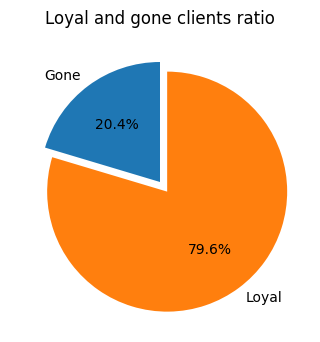

In [143]:
fig = plt.figure(figsize=(3, 3))
axes = fig.add_axes((1, 1, 1, 1))
pie = axes.pie(
    client_status,
    labels=client_status.index,
    autopct='%1.1f%%',
    startangle=90,
    explode = [0, 0.1]
)
title = axes.set_title('Loyal and gone clients ratio', fontsize=12)
plt.show(pie)

Most of clients are loyal. But, fifth part of clients is gone at the moment.   
This is huge part, and with proper methods, amount of loyal clients could be increased.   

Main information: 1/5 of clients are gone.

### task 9.2

119827

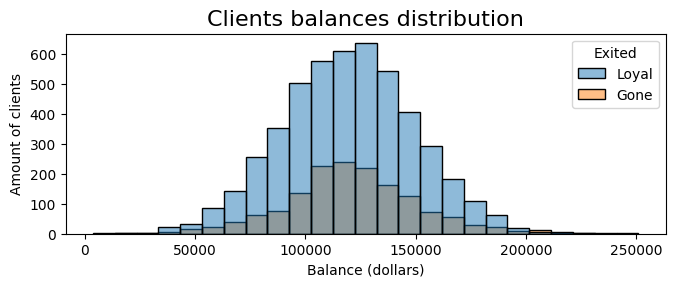

In [144]:
fig = plt.figure(figsize=(6, 2))
axes = fig.add_axes((1, 1, 1, 1))

histplot = sns.histplot(
    data=churn_data[churn_data['Balance'] > 2500],
    hue = 'Exited',
    x='Balance', 
    bins=25,
    ax=axes,
)
histplot.set_title('Clients balances distribution', fontsize=16)
histplot.set_xlabel('Balance (dollars)')
histplot.set_ylabel('Amount of clients')
display(round(churn_data[churn_data['Balance'] > 2500]['Balance'].mean()))

With bottom mark of 2500 dollars, clients balances has standard distribution. There are no anomalies. Mean ballance within this borders is almots 120000 dollars.   
According to loyality problem, it means that we still could have some clients gone with balance above 2500 dollars. And their distribution is corresponding with loyal one.   
The ratio between loyal and gone clients is worse then overall ratio in previous task. Almost one third of contributors is gone.   

Main information:
- 1/3 of clients-contributors is gone.
- balance distribution for loyal and gone clients is prety much the same. 

### task 9.3

0.0    3617
Name: Balance, dtype: int64

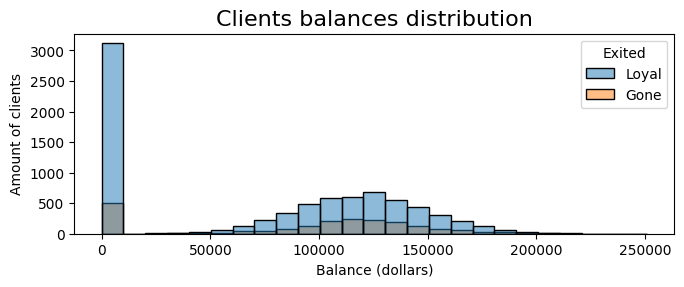

In [145]:
fig = plt.figure(figsize=(6, 2))
axes = fig.add_axes((1, 1, 1, 1))

histplot = sns.histplot(
    data=churn_data, hue = 'Exited',
    x='Balance', 
    bins=25,
    ax=axes,
)
histplot.set_title('Clients balances distribution', fontsize=16)
histplot.set_xlabel('Balance (dollars)')
histplot.set_ylabel('Amount of clients')

display(churn_data[churn_data['Balance'] <= 2500]['Balance'].value_counts())

Here we see, that clients with 0 dollars on thier balances are different. The ration between loyal and gone clients is better than overall. Only the sixth part of clients is gone.   
Clients with 0 dollars on their ballance are creditors. It means that creditors are more exited then contributors.   
Bank should improve it`s products for contributors.   

Main information:
- 1/6 of clients-creditors is gone.
- Creditors are more exited then contributors.

### Task 9.4

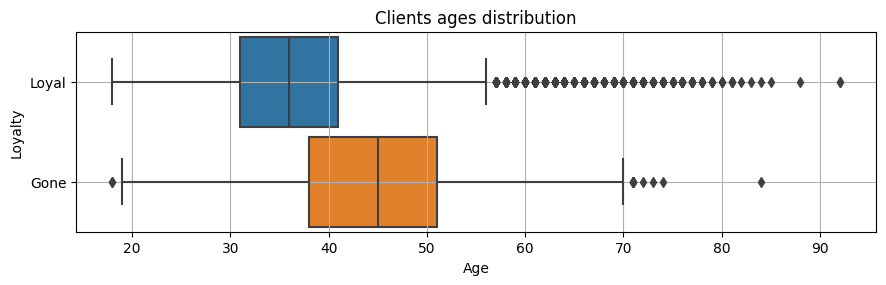

In [146]:
fig = plt.figure(figsize=(8, 2))
axes = fig.add_axes((1, 1, 1, 1))

boxplot = sns.boxplot(
    data=churn_data,
    x='Age',
    y='Exited',
    orient='h',
    width=0.9,
    ax = axes
)
boxplot.set_title('Clients ages distribution');
boxplot.set_xlabel('Age');
boxplot.set_ylabel('Loyalty');
boxplot.grid()

Median age for gone clients is abowe median age for loyal clietns. But, there are much more data ejections for loyal clients - it looks like some clients stay loyal to the bank.
We can see clearly intersection of third quantile for loyal clients and third quantile for gone clients. 38-41 years region is the border there loyal clients may become gone. And worse - after 55 years our clients become gone almoust every time!

Main information:
- Loyal clients age has more ejections.
- 55 years mark looks like most critical.
- 38-41 yeers old clients is a group to start to work with.

### task 9.5

In [147]:
display(churn_data['CreditScore'].max())
display(churn_data['EstimatedSalary'].max())

850

199992.48

Jointplot of CreditScore and EstimatedSalary parameters. Data is separated by loyalty (Exited parameter).

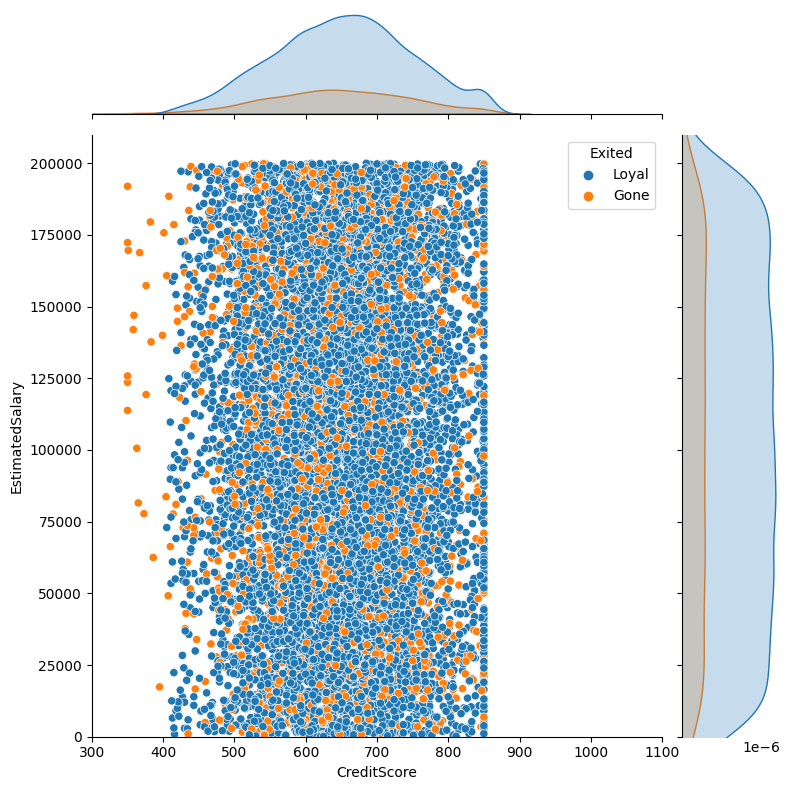

In [148]:
jointplot = sns.jointplot(
    data=churn_data, 
    x='CreditScore', 
    y='EstimatedSalary',
    hue='Exited',
    xlim = (300, 1100),
    ylim = (0, 210000),
    height=8,
    #kind = 'kde' #probably better picture for this data
)

Main information:
- There is now clear correlation.
- Both CreditScore and EstimatedSalary has similar distribution even separated by loyalty.

### task 9.6

In [149]:
gender_loyalty = basic_churn_data.groupby(by = 'Gender').mean()
display(gender_loyalty)

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
Gender,,,,,,,,,,,
Female,4942.929562,1.569115e+07,650.831389,39.238389,4.966102,75659.369139,1.544134,0.702619,0.502751,100601.541382,0.250715
Male,5048.427891,1.569077e+07,650.276892,38.658237,5.051677,77173.974506,1.518600,0.707898,0.525380,99664.576931,0.164559


Text(0, 0.5, 'Percentage')

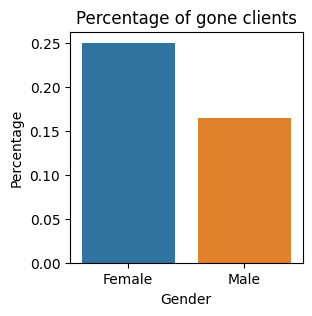

In [150]:
fig = plt.figure(figsize=(3, 3))
barplot = sns.barplot(
    data=gender_loyalty,
    x=gender_loyalty.index,
    y='Exited',
)
barplot.set_title('Percentage of gone clients');
barplot.set_ylabel('Percentage')

Main information:
- Female clients go away from our bank more often

### task 9.7

In [151]:
churn_data['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

In [152]:
products_groups = churn_data.groupby(by = 'Exited',as_index = False)['NumOfProducts'].value_counts()
display(products_groups)

,Exited,NumOfProducts,count
0,Loyal,2,4242
1,Loyal,1,3675
2,Loyal,3,46
3,Loyal,4,0
4,Gone,1,1409
5,Gone,2,348
6,Gone,3,220
7,Gone,4,60


Text(0, 0.5, 'Clients amount')

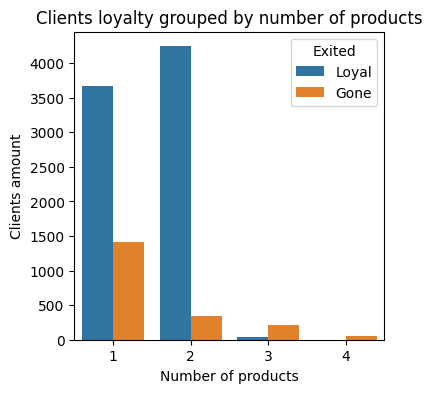

In [153]:
fig = plt.figure(figsize=(4, 4))
barplot = sns.barplot(
    data=products_groups,
    x = 'NumOfProducts',
    y = 'count',
    hue = 'Exited'
    )
barplot.set_title('Clients loyalty grouped by number of products');
barplot.set_xlabel('Number of products')
barplot.set_ylabel('Clients amount')

This bank has al least 4 products. Clients chouse one ore two products in common.   
Clients with one product:
- Loayl/Gone ratio is about 3/1.
- Catcphrase "What do we have here?". 
- Interested new clients are there.

Clients with two products:
- Loayl/Gone ratio is more than 10/1.
- Most loyal group.

Clients with three of four products:
- Loayl/Gone ratio is less than 1/10.
- Need a bank with better integration between their products.

Main information:
- Significant difference between loyalty for our groups.
- Need to examine specific products. Or PAIRS of specific products.
- Need to append product specification to our data for futher analysis.
- We don`t have triplets in products - so we need better integration between them.

### task 9.8

In [154]:
churn_data['IsActiveMember'] = churn_data['IsActiveMember'].astype('category')
churn_data['IsActiveMember'] = churn_data['IsActiveMember'].cat.rename_categories({
    0: 'Passive',
    1: 'Active'
})
display(churn_data['IsActiveMember'].cat.categories)

Index(['Passive', 'Active'], dtype='object')

In [155]:
activity_groups = churn_data.groupby(by = 'IsActiveMember',as_index = False)['Exited'].value_counts()
display(activity_groups)

,IsActiveMember,Exited,count
0,Passive,Loyal,3547
1,Passive,Gone,1302
2,Active,Loyal,4416
3,Active,Gone,735


Text(0, 0.5, 'Clients amount')

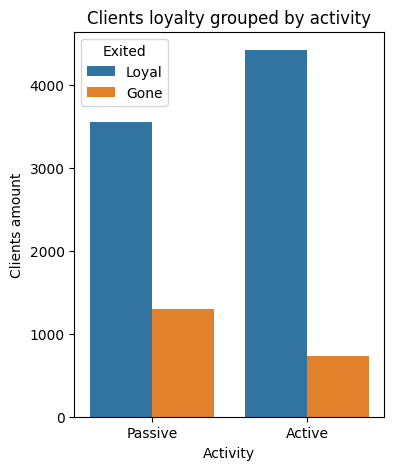

In [156]:
fig = plt.figure(figsize=(4,5))
barplot = sns.barplot(
    data = activity_groups,
    x = 'IsActiveMember',
    y = 'count',
    hue = 'Exited'
    )
barplot.set_title('Clients loyalty grouped by activity');
barplot.set_xlabel('Activity')
barplot.set_ylabel('Clients amount')

Main information:
- once again, significant differince between active and passive clients.
- passive clients gone 8 times more often then active.
- half of our clients are passive - we need to improve еtheir involvement to keep them loyal.

### task 9.9

In [157]:
country_group = basic_churn_data.groupby(by = 'Geography', as_index = False)['Exited'].mean()
display(country_group)

,Geography,Exited
0,France,0.161548
1,Germany,0.324432
2,Spain,0.166734


In [158]:
fig = px.choropleth(
    data_frame=country_group, 
    locations="Geography",
    locationmode = "country names",
    color="Exited",
    range_color=[0, 0.5],
    title='Loyalty between countries',
    width=800,
    height=500,
    color_continuous_scale='Reds'
)
fig.show()

Main information:
- German clients are most unloyal to our bank.
- Maybe some cultural issues.

### task 9.10

In [159]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"

In [160]:
basic_churn_data['CreditScoreCat'] = basic_churn_data['CreditScore'].apply(get_credit_score_cat)
basic_churn_data['CreditScoreCat'] = basic_churn_data['CreditScoreCat'].astype('category')
display(basic_churn_data['CreditScoreCat'].cat.categories)

Index(['Excellent', 'Fair', 'Good', 'Poor', 'Very_Poor'], dtype='object')

In [161]:
Credit_score_pivot = basic_churn_data.pivot_table(
    values = 'Exited',
    index = 'CreditScoreCat',
    columns = 'Tenure'
)
display(Credit_score_pivot)

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


Text(70.72222222222221, 0.5, 'Credit Score')

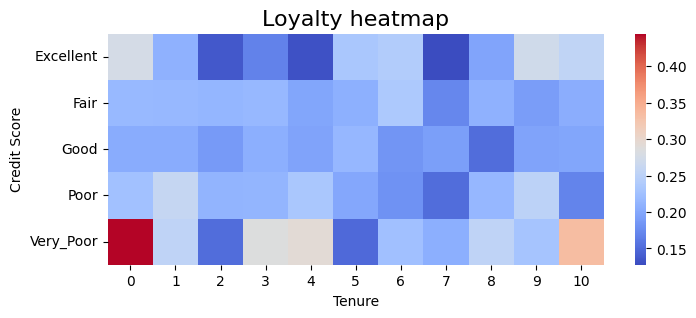

In [162]:
fig = plt.figure(figsize=(8,3))
heatmap = sns.heatmap(data=Credit_score_pivot, cmap='coolwarm')
heatmap.set_title('Loyalty heatmap', fontsize=16);
heatmap.set_ylabel('Credit Score')

Main information:
- Clients with very poor credit score go away from our bank. Most often at their first year. Probably bank kicks them away.
- Excellent clients has perceptible gone to loyal ratio. Bank should work better with them at their first year and consider some bonuses every 5 years.